<a href="https://colab.research.google.com/github/kurokaru87/desafio_dic/blob/main/desafio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
##cargar los datros desde la API
import pandas as pd
import requests

##conectar con la API de Telecom X
url="https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
response.status_code

##Convertir los data a DataFrame
data = response.json()
df = pd.DataFrame(data)

##validación de carga
df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


(7267, 6)

In [10]:
##Exploracion de columnas del dataset
##permite ver nombre de columna, identificar valores nulos, revisar tipo de dato
df.info()
df.dtypes
df.columns

df.head()
df.sample(5)

##columnas más relevantes para el análisis de evasión
##variable objetivo --> Churn
##indica si el cliente abandonó o no el servicio


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
4344,5960-WPXQM,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
80,0128-MKWSG,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4204,5777-KJIRB,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1232,1763-KUAAW,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
4324,5939-XAIXZ,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**Diccionario de datos**


1.   customerID → Identificador único del cliente
2.   gender → Género
3.   SeniorCitizen → Adulto mayor (0 / 1)
4.   Dependents → Tiene dependientes
5.   tenure → Meses de permanencia
6.   PhoneService, InternetService, StreamingTV, etc. → Servicios contratados
7.   Contract → Tipo de contrato
8.   PaymentMethod → Método de pago
9.   MonthlyCharges → Cargo mensual
10.   TotalCharges → Cargo total
11.  ***Churn → Evasión del cliente (variable objetivo)***
<br>

**Variables demográficas**
1.   gender
2.   SeniorCitizen
3.   Partner
4.   Dependents
<br>

**Variables de contrato y permanencia**
1.  tenure
2.  Contract
3.  PaymentMethod
4.  PaperlessBilling
<br>

**Servicios contratados**
1.  PhoneService
2.  MultipleLines
3.  InternetService
4.  OnlineSecurity
5.  OnlineBackup
6.  DeviceProtection
7.  TechSupport
8.  StreamingTV
9.  StreamingMovies
<br>

**Variables económicas**
1.  MonthlyCharges
2.  TotalCharges








In [13]:
##Diccionarios
##identificar columnas
df.applymap(type).head()

##normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

##se unen los datos al DataFrame
##se eliminan columnas originales
df_flat = df.drop(columns=['customer', 'phone', 'internet', 'account'])

##se concatenan
df_flat = pd.concat(
    [df_flat, customer_df, phone_df, internet_df, account_df],
    axis=1
)

##se verifica el nuevo DataFrame
df_flat.info()
df_flat.head()




/tmp/ipython-input-1086703301.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(type).head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [20]:
##Verificación de datos

##valores ausentes
df_flat.isnull().sum()
(df_flat.isnull().mean() * 100).round(2)

##duplicados
df_flat.duplicated().sum()

##inconsistencias
df_flat['Churn'].unique()
df_flat['Contract'].unique()
df_flat['PaymentMethod'].unique()
df_flat['InternetService'].unique()

##blancos
df_flat = df_flat.apply(
    lambda col: col.str.strip() if col.dtype == "object" else col
)

##corrección formatos
df_flat[['Charges.Monthly', 'Charges.Total']].dtypes
df_flat['Charges.Total'] = pd.to_numeric(
    df_flat['Charges.Total'], errors='coerce'
)
df_flat['Charges.Total'].isnull().sum()
df_flat[['Charges.Monthly', 'Charges.Total', 'tenure']].describe()
# en caso de haber fechas
# df_flat['fecha'] = pd.to_datetime(df_flat['fecha']).dt.normalize()

##validación de rangos y valores externos
df_flat[['Charges.Monthly', 'Charges.Total', 'tenure']].describe()

## validación de fecha en caso de haber
# df_flat['fecha'] = pd.to_datetime(df_flat['fecha']).dt.normalize()




,Charges.Monthly,Charges.Total,tenure
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,32.346498
std,30.129572,2268.632997,24.571773
min,18.250000,18.800000,0.000000
25%,35.425000,400.225000,9.000000
50%,70.300000,1391.000000,29.000000
75%,89.875000,3785.300000,55.000000
max,118.750000,8684.800000,72.000000


In [21]:
##manejo de inconsistencias

##verificación tipos de dato
df_flat[['Charges.Monthly', 'Charges.Total']].dtypes
df_flat['Charges.Total'] = pd.to_numeric(
    df_flat['Charges.Total'], errors='coerce'
)
##nulos
df_flat['Charges.Total'].isnull().sum()

##estandarización de los textos
##minusculas
cols_texto = df_flat.select_dtypes(include='object').columns
df_flat[cols_texto] = df_flat[cols_texto].apply(lambda x: x.str.lower())

##eliminación de espacios innecesarios
df_flat[cols_texto] = df_flat[cols_texto].apply(lambda x: x.str.strip())

##unificación de valores
df_flat['InternetService'].unique()
df_flat['InternetService'] = df_flat['InternetService'].replace(
    {'no internet service': 'no'}
)
servicios = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in servicios:
    df_flat[col] = df_flat[col].replace({'no internet service': 'no'})


##identificacion de contratos mensuales
df_flat['Contract'].str.contains('month').value_counts()
df_flat['contract_monthly'] = df_flat['Contract'].str.startswith('month')

##verificación
df_flat['contract_monthly'] = df_flat['Contract'].str.startswith('month')
df_flat['contract_monthly'] = df_flat['Contract'].str.startswith('month')
df_flat['Churn'].value_counts()



,count
Churn,
no,5174
yes,1869
,224


In [22]:
##estandarizaci´pn de los datos previo a creación de columna

##minusculas
df_flat = df_flat.apply(
    lambda col: col.str.lower() if col.dtype == "object" else col
)

##blancos
df_flat = df_flat.apply(
    lambda col: col.str.strip() if col.dtype == "object" else col
)

##inconsistencias
df_flat['InternetService'] = df_flat['InternetService'].replace(
    {'no internet service': 'no'}
)

##validación de resultados
df_flat['InternetService'].unique()

##formato numérico para columnas
df_flat[['Charges.Monthly', 'Charges.Total']].dtypes
df_flat['Charges.Monthly'] = pd.to_numeric(
    df_flat['Charges.Monthly'], errors='coerce'
)

df_flat['Charges.Total'] = pd.to_numeric(
    df_flat['Charges.Total'], errors='coerce'
)

##verificación de valores
df_flat[['Charges.Monthly', 'Charges.Total']].isnull().sum()


##creación de columna "Cuentas_Diarias"
# Utiliza la facturación mensual para calcular el valor diario, proporcionando
# una visión más detallada del comportamiento de los clientes a lo largo del
# tiempo.#

##creación de la columna
df_flat['Cuentas_Diarias'] = df_flat['Charges.Monthly'] / 30

#verificación
df_flat[['Charges.Monthly', 'Cuentas_Diarias']].head()

#validacion de la nueva variable
df_flat['Cuentas_Diarias'].describe()




,Cuentas_Diarias
count,7267.000000
mean,2.157337
std,1.004319
min,0.608333
25%,1.180833
50%,2.343333
75%,2.995833
max,3.958333


In [27]:
df_flat.columns


Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total',
       'contract_monthly', 'cuentas_diarias'],
      dtype='object')

In [29]:
##análisis descriptivo


##vista del dataset
df_flat.describe(include='all')

##columnas numericas
df_flat[['charges.monthly', 'charges.total', 'tenure']].describe()

##medidas estadistivas
df_flat['charges.monthly'].mean()
df_flat['charges.monthly'].median()
df_flat['charges.monthly'].std()

df_flat['tenure'].mean()
df_flat['tenure'].median()

##distribucion de la evasion.
##% clientes que abandona
df_flat['churn'].value_counts()
df_flat['churn'].value_counts(normalize=True) * 100

#tipo contrato
df_flat['contract'].value_counts()

#facturacion papel
df_flat['paperlessbilling'].value_counts()

#datos para insights
df_flat.groupby('churn')[['charges.monthly', 'charges.total', 'tenure']].mean()




,charges.monthly,charges.total,tenure
churn,,,
0.0,61.265124,2555.344141,37.569965
1.0,74.441332,1531.796094,17.979133


In [32]:
##como está distribuida la variable churn(evasion) entre los clientes.
##Utilizar graficos para visualizar proporcion de clientes que permanecieron y los que se dieron de baja

#verificacipon de valores
df_flat['churn'].unique()

#conteo de clientes
df_flat['churn'].value_counts()
df_flat['churn'].value_counts(normalize=True) * 100



,proportion
churn,
0.0,73.463013
1.0,26.536987


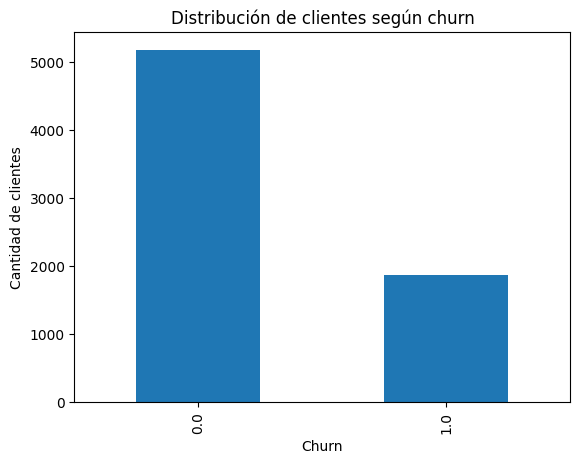

In [33]:
##gráfico de barras para distribución de churn
import matplotlib.pyplot as plt

churn_counts = df_flat['churn'].value_counts()

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de clientes según churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


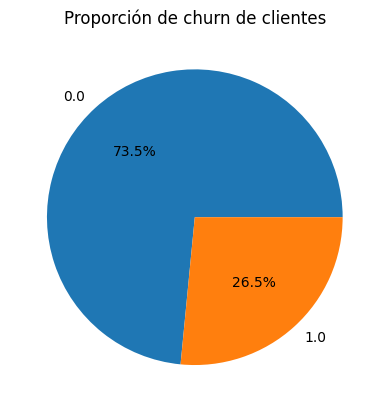

In [34]:
##gráfico de bproporcion
plt.figure()
churn_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Proporción de churn de clientes')
plt.show()


In [37]:
df_flat.columns


Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly', 'charges.total',
       'contract_monthly', 'cuentas_diarias'],
      dtype='object')

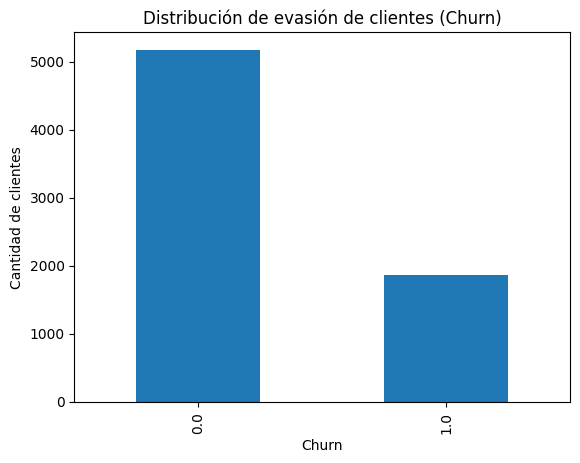

In [36]:
##cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.
##puede revelar patrones. clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

##distribucion variable
df_flat['churn'].value_counts()
df_flat['churn'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

df_flat['churn'].value_counts().plot(kind='bar')
plt.title('Distribución de evasión de clientes (Churn)')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


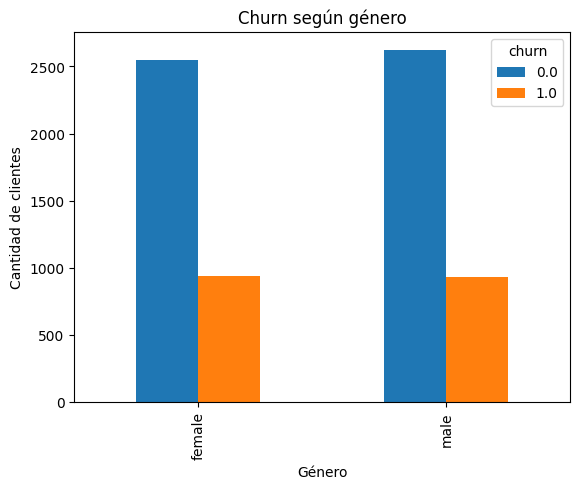

In [38]:
##según género
pd.crosstab(df_flat['gender'], df_flat['churn'], normalize='index') * 100

#gráfico
pd.crosstab(df_flat['gender'], df_flat['churn']).plot(kind='bar')
plt.title('Churn según género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.show()


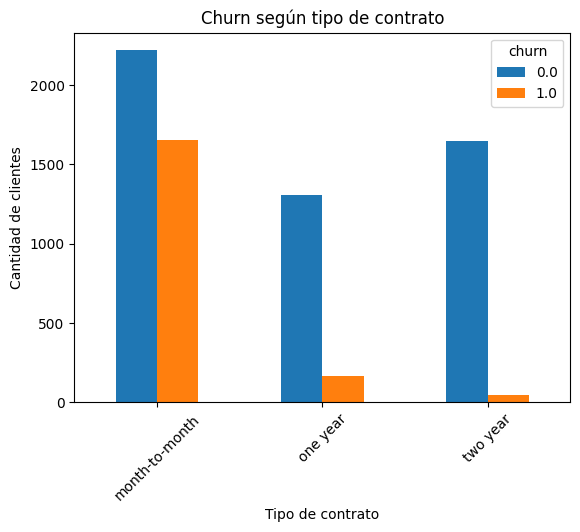

In [39]:
##según tipo contrato
pd.crosstab(df_flat['contract'], df_flat['churn'], normalize='index') * 100

pd.crosstab(df_flat['contract'], df_flat['churn']).plot(kind='bar')
plt.title('Churn según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()


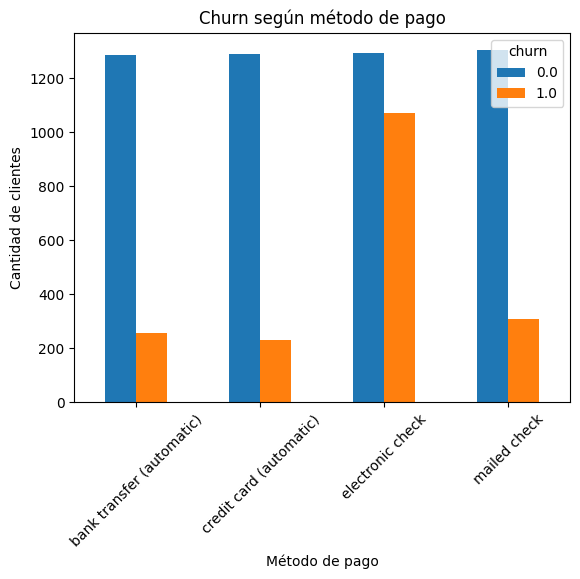

In [40]:
##según método de pago
pd.crosstab(df_flat['paymentmethod'], df_flat['churn'], normalize='index') * 100

pd.crosstab(df_flat['paymentmethod'], df_flat['churn']).plot(kind='bar')
plt.title('Churn según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()



In [41]:
##según facturacion
pd.crosstab(df_flat['paperlessbilling'], df_flat['churn'], normalize='index') * 100


churn,0.0,1.0
paperlessbilling,,
no,83.669916,16.330084
yes,66.434908,33.565092


In [42]:
##explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato",
##se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron

##variables
df_flat[['charges.monthly', 'charges.total', 'tenure']].describe()


,charges.monthly,charges.total,tenure
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,32.346498
std,30.129572,2268.632997,24.571773
min,18.250000,18.800000,0.000000
25%,35.425000,400.225000,9.000000
50%,70.300000,1391.000000,29.000000
75%,89.875000,3785.300000,55.000000
max,118.750000,8684.800000,72.000000


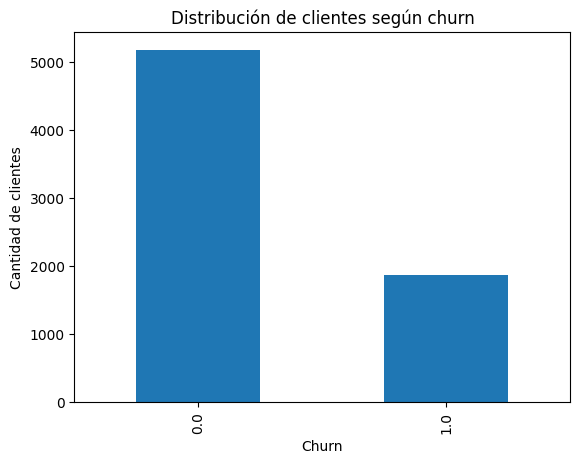

In [43]:
##conteo de clientes
df_flat['churn'].value_counts()
df_flat['churn'].value_counts(normalize=True) * 100

import matplotlib.pyplot as plt

df_flat['churn'].value_counts().plot(kind='bar')
plt.title('Distribución de clientes según churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


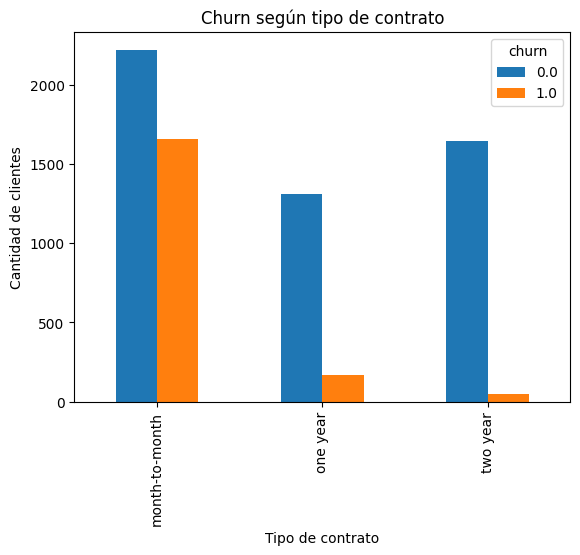

In [44]:
##evasión
#churn vs tipo de contrato
pd.crosstab(df_flat['contract'], df_flat['churn'], normalize='index') * 100

pd.crosstab(df_flat['contract'], df_flat['churn']).plot(kind='bar')
plt.title('Churn según tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.show()


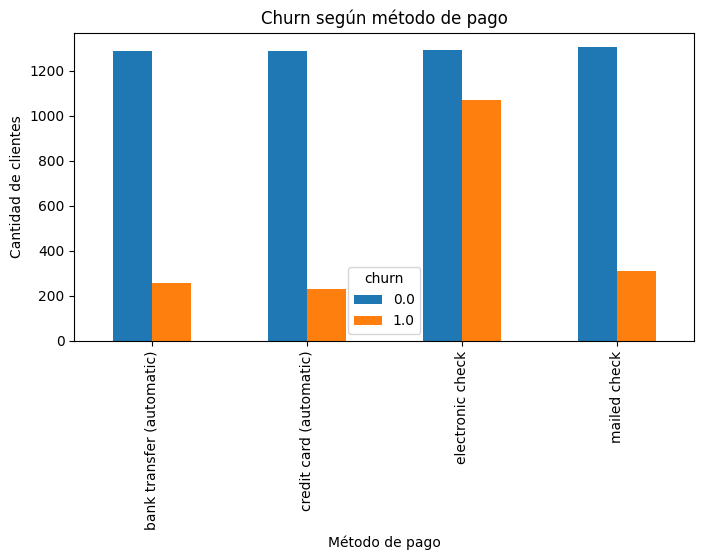

In [45]:
##churn vs método de pago
pd.crosstab(df_flat['paymentmethod'], df_flat['churn'], normalize='index') * 100

pd.crosstab(df_flat['paymentmethod'], df_flat['churn']).plot(kind='bar', figsize=(8,4))
plt.title('Churn según método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.show()



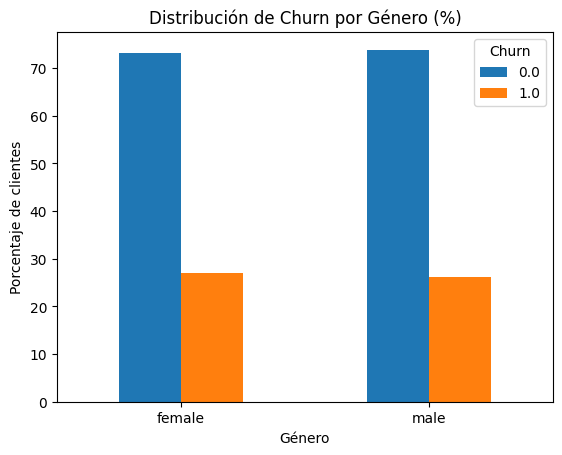

In [56]:
##churn vs genero
pd.crosstab(df_flat['gender'], df_flat['churn'], normalize='index') * 100

churn_gender.plot(kind='bar')

plt.title('Distribución de Churn por Género (%)')
plt.xlabel('Género')
plt.ylabel('Porcentaje de clientes')
plt.legend(title='Churn')
plt.xticks(rotation=0)

plt.show()




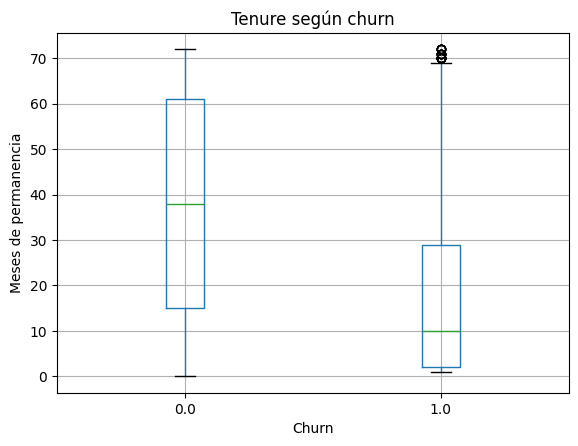

In [47]:
##ternure vs chunr
df_flat.groupby('churn')['tenure'].describe()

df_flat.boxplot(column='tenure', by='churn')
plt.title('Tenure según churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de permanencia')
plt.show()



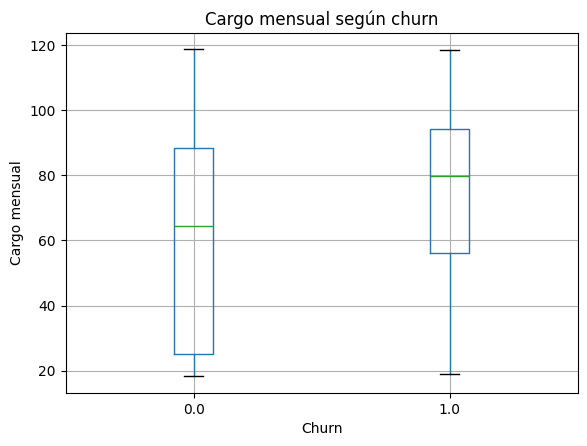

In [48]:
##cargos del mes vs churn
df_flat.groupby('churn')['charges.monthly'].describe()

df_flat.boxplot(column='charges.monthly', by='churn')
plt.title('Cargo mensual según churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargo mensual')
plt.show()


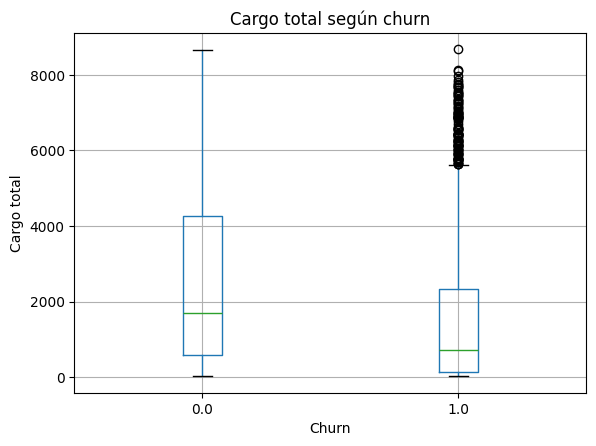

In [49]:
##cargos totales vs churn
df_flat.groupby('churn')['charges.total'].describe()

df_flat.boxplot(column='charges.total', by='churn')
plt.title('Cargo total según churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargo total')
plt.show()


## **Informe Final**

## Introducción
El objetivo principal de este proyecto es analizar la evasión de clientes (Churn) en la empresa Telecom X, con la identificación factores que se asocian a la cancelación del servicio.

La evasión de clientes es un desafío para las empresas de
telecomunicaciones, impactando directamente en los ingresos y sostenibilidad
del negocio.

Mediante el análisis de datos demográficos, contractuales, de servicios
y de facturación, se analizará el comportamiento de los clientes y se generarán
insights que permitan reducir la tasa de cancelación.

## Limpieza y Tratamiento de Datos
Se obtuvieron los datos desde una API en formato JSON y cargados directamente en
un DataFrame de Pandas.

Se identificaron estructuras anidadas,que fueron normalizadas utilizando `pd.json_normalize()` para obtener un dataset plano.

Se realizaron tareas de limpieza y validación:
- Identificación y tratamiento de valores ausentes.
- Verificación de registros duplicados.
- Corrección de errores de formato en variables numéricas.
- Revisión de inconsistencias en variables categóricas.
- Limpieza de strings (minúsculas, espacios en blanco).

Se creó la variable `cuentas_diarias` a partir de la facturación mensual,
para permitir un análisis más detallado del comportamiento de los clientes.

 ## Análisis Exploratorio de Datos
Se realizó un análisis exploratorio para comprender la distribución de los clientes y su relación con la evasión (churn).

Entre los principales análisis se incluyen:
- Distribución general de la evasión de clientes.
- Análisis de churn según variables categóricas como género, tipo de contrato y
  método de pago.
- Comparación de variables numéricas (facturación total, facturación mensual y
  tiempo de permanencia) entre clientes que cancelaron y los que permanecieron.
- Visualizaciones gráficas para identificar patrones y diferencias relevantes.

Estos análisis permitieron identificar perfiles de clientes con mayor probabilidad de evasión y variables clave asociadas al abandono del servicio.


## Conclusiones e Insights
Se identificaron los siguientes hallazgos clave:
- Los clientes con contratos de corto plazo presentan una mayor tasa de evasión en comparación con aquellos con contratos de largo plazo.
- Una menor permanencia (tenure) está fuertemente asociada a una mayor probabilidad de cancelación.
- Los clientes con menores cargos totales suelen presentar mayores niveles de churn, lo que sugiere una menor vinculación con el servicio.
- El método de pago y algunos servicios contratados muestran diferencias relevantes en la tasa de evasión, lo que permite segmentar perfiles de riesgo.

Los resultados evidencian que la evasión no ocurre de manera aleatoria, sino que
está asociada a características específicas del cliente y del tipo de contrato.


## Recomendaciones
Se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:
- Implementar estrategias de retención temprana para clientes nuevos, especialmente durante los primeros meses de contrato.
- Incentivar contratos de mayor duración mediante beneficios económicos o servicios adicionales.
- Diseñar campañas personalizadas para clientes con bajo nivel de permanencia y
  cargos reducidos.
- Analizar y optimizar los métodos de pago asociados a mayores tasas de evasión.
- Utilizar estos resultados como base para modelos predictivos de churn que permitan anticipar la cancelación de clientes.

Estas acciones pueden contribuir a mejorar la fidelización y reducir el impacto
negativo de la evasión en el negocio.


